In [3]:
import numpy as np  # for numerical computations
import pandas as pd  # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualization
import sklearn

In [11]:
df= pd.read_csv(r'D:\Yuvraj\My practice\NLP Practice\dataset\quora_duplicate_questions.csv')

In [12]:
df.shape

(345036, 7)

In [13]:
df.head()

,index,id,qid1,qid2,question1,question2,is_duplicate
0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
4,4,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1


In [14]:
 df.sample(10)

,index,id,qid1,qid2,question1,question2,is_duplicate
59942,59942,70248,139623,139624,If you were asking a student loan borrower jus...,Are book collectors possessive about their boo...,0
178587,178587,209235,412733,412734,How can I suspend A2A requests?,How do I cancel an A2A request?,1
153799,153799,180240,356008,356009,What are the security features of a new Rs. 50...,Why are some news channel and people saying th...,1
341282,341282,399924,781324,781325,"I want to Comment ""Joke of the Day!"" in face b...",Could Madara really resurrect the Ten Tails ev...,0
183720,183720,215240,424435,424436,Which is the best phone under ₹15000?,Which is the best phone to buy within Rs.15000?,1
114454,114454,134064,265489,265490,How do I make a manual light switch?,How should I react if someone repeatedly adden...,0
299959,299959,351524,688611,688612,Why do we give so much respect to our soldiers...,I give tuitions to students of class 7&8. They...,0
91808,91808,107543,213283,213284,When are the JEE Mains 2015 paper 2 of B.Arch ...,When will the Jee Mains Paper 2 (B.Arch) resul...,0
192283,192283,225303,206356,444056,What is the best macro lens for a Canon DSLR?,What is the best 1:1 macro lens for Canon?,1
315985,315985,370174,541333,724399,How does someone become a better problem solver?,How can I be a problem solver?,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345036 entries, 0 to 345035
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         345036 non-null  int64 
 1   id            345036 non-null  int64 
 2   qid1          345036 non-null  int64 
 3   qid2          345036 non-null  int64 
 4   question1     345035 non-null  object
 5   question2     345034 non-null  object
 6   is_duplicate  345036 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 18.4+ MB


In [17]:
# missing Values
df.isnull().sum()

index           0
id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0    208756
1    136280
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


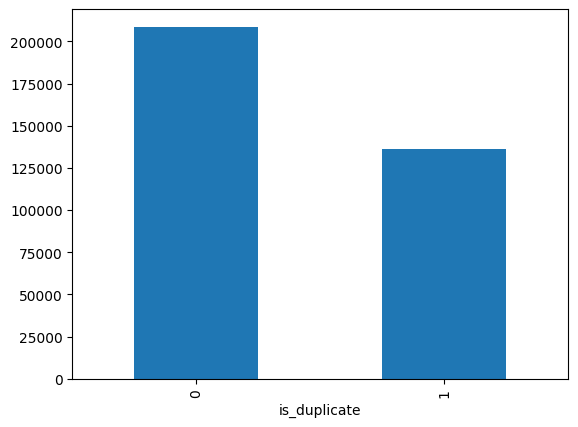

In [20]:
# distribution of duplicate & non duplicate questions

print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts().plot(kind='bar'))

In [51]:
# lets work on few data 50000 rows only

new_df = df.sample(30000)

In [52]:
new_df.isnull().sum()

index           0
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [53]:
new_df.duplicated()

262652    False
195005    False
281234    False
119343    False
308617    False
          ...  
174131    False
45996     False
138085    False
68191     False
15281     False
Length: 30000, dtype: bool

In [54]:
ques_df = new_df[['question1','question2']]

In [45]:
ques_df

,question1,question2
276376,What is 11x a good P/E ratio to buy?,What is the current P/E ratio for the Nikkei 225?
246241,Where can I download dragon ball episodes?,Where can I download episodes of dragon ball?
43351,What is Apache Spark streaming?,How do I learn spark streaming?
154016,Is energy in vacuum real? How do we know that ...,Are vacuum fluctuations an energy in a vacuum?...
64277,What is the diverge of parallel?,What will you do if you were in the shoes disc...
...,...,...
323367,Which is better for an undergraduate CS Erasmu...,Why do Commonwealth military units have their ...
126340,Are software licenses considered a capital or ...,Is salary expense or marketing expense conside...
155722,What is the remainder when 21! Is divided by 23?,What is the remainder when 30^100 is divided b...
329483,What are the best aspects of working at First ...,What are the best aspects of working at First ...


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
question = list(ques_df['question1']+ques_df['question2'])

In [66]:
cv=CountVectorizer(max_features=3000)

q1_arr,q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [61]:
print(q1_arr.shape)        # Should output (15000, 3000)
print(ques_df.index.shape) # Should output (30000,)


(15000, 3000)
(30000,)


In [68]:
q1_arr = np.tile(q1_arr, (2, 1))  # Doubles the rows if needed
q2_arr = np.tile(q2_arr, (2, 1))  # Doubles the rows if needed


In [69]:
temp_df1= pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2= pd.DataFrame(q2_arr, index= ques_df.index)
temp_df=pd.concat([temp_df1, temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [71]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [72]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
262652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
308617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
138085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
temp_df.shape

(30000, 6001)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=2)

In [76]:
## By using Randomforest Classifier to find out acuracy score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.55

In [79]:
## By using XGBClassifier to find out score

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.6298333333333334

In [80]:
## we got better accuracy  in XGBClassifier between above two classifier 